## ENTRENAMIENTO MODELO Y EVALUACIÓN

In [1]:
import pandas as pd
import pickle 

In [2]:
df = pd.read_csv('../data/train/train1.csv')
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,danceability_category_encoded,loudness_category_numerica,loudness_category_numerica2,valence_cat_num,speech_cat_num,speech_cat_num2,energy_cat_num,energy_cat_num2,popularity_cat_num,popularity_cat_num2
0,33018.0,Staind,Zoe Jane,52.0,0.01460,0.505,276840.0,0.687,0.021800,D#,...,0,5.0,9.0,0.0,0.0,0.0,3.0,6.0,2.0,6.0
1,83669.0,Ella Fitzgerald,People Will Say We're In Love,32.0,0.75300,0.304,-1.0,0.309,0.000000,G#,...,0,1.0,6.0,2.0,0.0,0.0,1.0,2.0,1.0,4.0
2,28174.0,empty_field,Glow Like Dat,65.0,0.41100,0.787,210862.0,0.586,0.000311,A#,...,1,5.0,9.0,4.0,1.0,2.0,2.0,7.0,3.0,2.0
3,39987.0,Pop Evil,Boss's Daughter,44.0,0.00016,0.418,-1.0,0.966,0.005690,G,...,0,4.0,6.0,4.0,4.0,14.0,4.0,4.0,2.0,6.0
4,55319.0,Frank Zappa,Muffin Man,48.0,0.11100,0.412,337733.0,0.657,0.000088,F#,...,0,1.0,6.0,6.0,1.0,2.0,3.0,6.0,2.0,6.0


In [3]:
df1 = pd.read_csv('../data/test/test1.csv')
df1.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,danceability_category_encoded,loudness_category_numerica,loudness_category_numerica2,valence_cat_num,speech_cat_num,speech_cat_num2,energy_cat_num,energy_cat_num2,popularity_cat_num,popularity_cat_num2
0,24735.0,The Dead Weather,Bone House,25.0,0.007730,0.530,206800.0,0.896,0.003030,G,...,1,5.0,9.0,2.0,2.0,6.0,4.0,4.0,1.0,4.0
1,41022.0,ZAQ,Last Proof - Instrumental,14.0,0.000015,0.378,284413.0,0.846,0.746000,G#,...,0,5.0,9.0,4.0,1.0,2.0,4.0,4.0,0.0,0.0
2,69676.0,!!!,Californiyeah,36.0,0.024900,0.865,274013.0,0.650,0.000391,A,...,1,5.0,9.0,4.0,2.0,6.0,3.0,6.0,1.0,4.0
3,71071.0,Norah Jones,Lonestar,52.0,0.888000,0.642,186080.0,0.139,0.000014,C,...,1,1.0,6.0,2.0,0.0,0.0,0.0,0.0,2.0,6.0
4,39042.0,Greta Van Fleet,Rolling In The Deep - Recorded At Spotify Stud...,64.0,0.005700,0.615,237653.0,0.487,0.002990,B,...,1,1.0,6.0,2.0,0.0,0.0,2.0,7.0,3.0,2.0


In [4]:
# Datos entrenamiento
X_train = df[['popularity',
       'acousticness',
       'instrumentalness',
        'valence',  'loudness_category_numerica2',
       'speech_cat_num2',
        'energy_cat_num2']]
y_train = df["danceability_category_encoded"]

In [5]:
# Datos test
X_test = df1[['popularity',
       'acousticness',
       'instrumentalness',
        'valence',  'loudness_category_numerica2',
       'speech_cat_num2',
        'energy_cat_num2']]
y_test = df1["danceability_category_encoded"]

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


## Modelo 1: Random Forest Classifier 

In [9]:

from sklearn.ensemble import RandomForestClassifier


steps = [
    
    ('classifier', RandomForestClassifier(random_state=42))
]

pipeline = Pipeline(steps)

param_dist = {
    
    'classifier__n_estimators': [70, 80,100, 120],
    'classifier__max_depth': [7,8, 9, 10],
    'classifier__max_leaf_nodes': [50, 55, 60]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=4, n_iter=20,n_jobs=-1, random_state=42,verbose= 2)


rfc =random_search.fit(X_train, y_train)

best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best Score: 0.7481749999999999
Best Parameters: {'classifier__n_estimators': 80, 'classifier__max_leaf_nodes': 60, 'classifier__max_depth': 10}
Best Estimator: Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=10, max_leaf_nodes=60,
                                        n_estimators=80, random_state=42))])


In [10]:
best_model1 = rfc.best_estimator_.fit(X_train, y_train)

In [12]:
# Predicciones sobre TRAIN
pred_train = best_model1.predict(X_train)
pred_proba_train = best_model1.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train, average='weighted'))
print('Recall:', recall_score(y_train, pred_train, average='weighted'))
print('F1 Score:', f1_score(y_train, pred_train, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = best_model1.predict(X_test)
pred_proba_test = best_model1.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test, average='weighted'))
print('Recall:', recall_score(y_test, pred_test, average='weighted'))
print('F1 Score:', f1_score(y_test, pred_test, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

Resultados sobre TRAIN
Accuracy: 0.75505
Precision: 0.7589201287577527
Recall: 0.75505
F1 Score: 0.7442237384734439
Confusion Matrix:
 [[ 8617  7339]
 [ 2459 21585]]
Resultados sobre TEST
Accuracy: 0.7384
Precision: 0.7400236801991904
Recall: 0.7384
F1 Score: 0.7261907620302943
Confusion Matrix:
 [[2029 1932]
 [ 684 5355]]


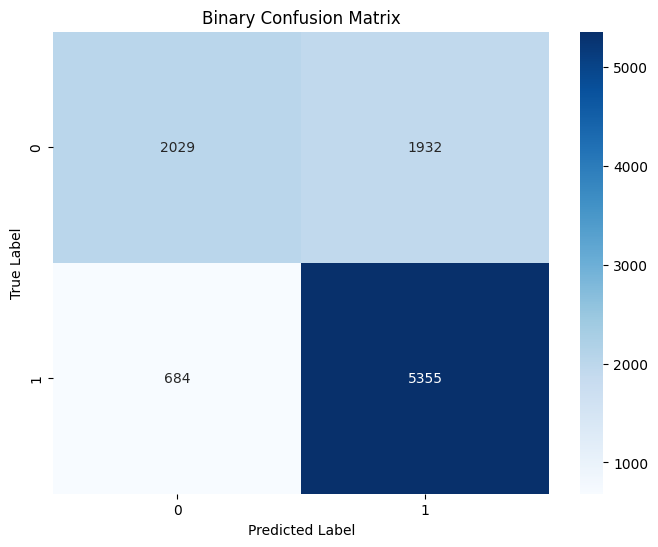

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcula la matriz de confusión binaria
c_matrix_binary = confusion_matrix(y_test, pred_test)

# Crea el objeto de la figura
plt.figure(figsize=(8, 6))

# Plotea la matriz de confusión binaria
sns.heatmap(c_matrix_binary, annot=True, cmap='Blues', fmt='g')

plt.title('Binary Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




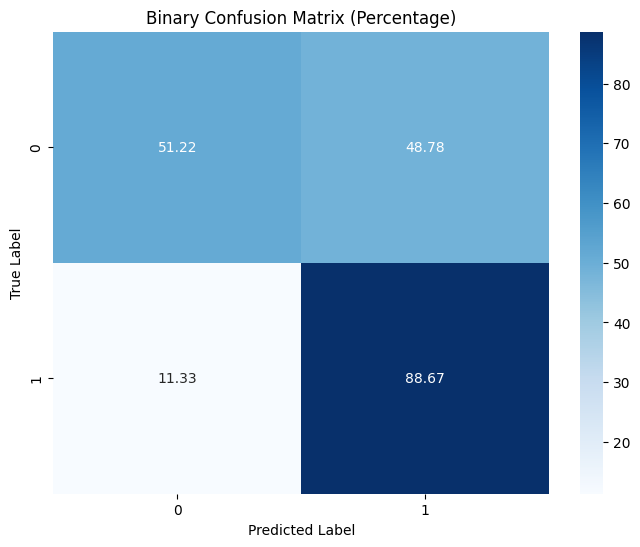

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calcula la matriz de confusión binaria
c_matrix_binary = confusion_matrix(y_test, pred_test)

# Calcula los porcentajes dividiendo cada elemento de la matriz por el número total de muestras en esa clase
total_samples = c_matrix_binary.sum(axis=1)[:, np.newaxis]
c_matrix_binary_percent = (c_matrix_binary / total_samples) * 100

# Crea el objeto de la figura
plt.figure(figsize=(8, 6))

# Plotea la matriz de confusión binaria en porcentaje
sns.heatmap(c_matrix_binary_percent, annot=True, cmap='Blues', fmt='.2f')

plt.title('Binary Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [37]:
filename = '../models_class/final_model1.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(best_model1, archivo_salida)

### Model 2: XGboost Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Definir el espacio de búsqueda de hiperparámetros para Gradient Boosting Classifier
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear el modelo Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(gb_model, param_distributions=param_dist, n_iter=10, cv=4, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

# Obtener los mejores resultados
best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

# Obtener el mejor modelo
best_model = random_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Fitting 4 folds for each of 10 candidates, totalling 40 fits


c:\Users\anaes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
12 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anaes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anaes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\anaes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py"

Best Score: 0.7531749999999999
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.1}
Best Estimator: GradientBoostingClassifier(max_depth=5, max_features='log2', min_samples_leaf=2,
                           n_estimators=50, random_state=42)
Accuracy: 0.7407


In [32]:
best_model2 = xgb_model.best_estimator_.fit(X_train, y_train)

In [33]:
pred_train = best_model2.predict(X_train)
pred_proba_train = best_model2.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train, average='weighted'))
print('Recall:', recall_score(y_train, pred_train, average='weighted'))
print('F1 Score:', f1_score(y_train, pred_train, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = best_model2.predict(X_test)
pred_proba_test = best_model2.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test, average='weighted'))
print('Recall:', recall_score(y_test, pred_test, average='weighted'))
print('F1 Score:', f1_score(y_test, pred_test, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

Resultados sobre TRAIN
Accuracy: 0.818875
Precision: 0.8224015481698705
Recall: 0.818875
F1 Score: 0.8140309902679661
Confusion Matrix:
 [[10627  5329]
 [ 1916 22128]]
Resultados sobre TEST
Accuracy: 0.7449
Precision: 0.7430485187408014
Recall: 0.7449
F1 Score: 0.7373406273061106
Confusion Matrix:
 [[2233 1728]
 [ 823 5216]]


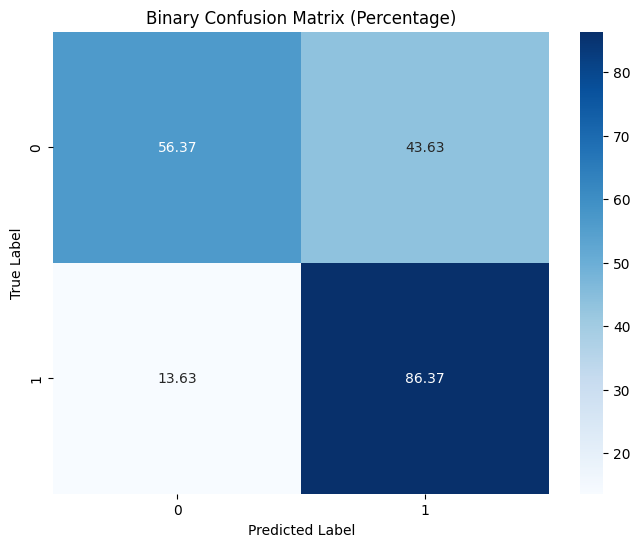

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calcula la matriz de confusión binaria
c_matrix_binary = confusion_matrix(y_test, pred_test)

# Calcula los porcentajes dividiendo cada elemento de la matriz por el número total de muestras en esa clase
total_samples = c_matrix_binary.sum(axis=1)[:, np.newaxis]
c_matrix_binary_percent = (c_matrix_binary / total_samples) * 100

# Crea el objeto de la figura
plt.figure(figsize=(8, 6))

# Plotea la matriz de confusión binaria en porcentaje
sns.heatmap(c_matrix_binary_percent, annot=True, cmap='Blues', fmt='.2f')

plt.title('Binary Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [36]:
filename = '../models_class/final_model2.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(best_model2, archivo_salida)

### Model 3: Gradient Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Definir el espacio de búsqueda de hiperparámetros para Gradient Boosting Classifier
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear el modelo Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(gb_model, param_distributions=param_dist, n_iter=10, cv=4, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = random_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


c:\Users\anaes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
12 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anaes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anaes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\anaes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py"

Accuracy: 0.7407
